# The Battle of the Neighborhoods a comparison of Warsaw and Budapest

### Importing necessary libraries

In [1]:
import urllib.request # library for reading HTML pages  
from bs4 import BeautifulSoup # Library for scrapping HTML pages
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
# Import math Library
import math
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes 
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes 
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

### Importing Warsaw data

In [3]:
# specify which URL/web page we are going to be scraping
urlWarsaw = "https://en.wikipedia.org/wiki/Districts_of_Warsaw"
# open the url using urllib.request and put the HTML into the page variable
pageWarsaw = urllib.request.urlopen(urlWarsaw)

In [4]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soupWarsaw = BeautifulSoup(pageWarsaw, "lxml")

In [5]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tablesWarsaw=soupWarsaw.find_all("table")

In [6]:
# Looking through the output of ”all_tables” we can again see that the class id of our chosen table is ”wikitable sortable”. 
# We can use this to get BS to only bring back the table data for this particular table and keep that in a variable called ”right_table“

right_table_Warsaw=soupWarsaw.find('table', class_='wikitable sortable')

# There are three columns in our table that we want to scrape the data from so we will set up three empty lists 
# (Postalcode, Borough, Neighbourhood) to store our data in

District=[]
Population=[]
Area=[]

#Using findAll function of Beautiful soup package I am getting all data from the table in the list

for row in right_table_Warsaw.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        District.append(cells[0].find(text=True).rstrip("\n"))
        Population.append(int(cells[1].find(text=True).rstrip("\n").replace(',', '')))
        Area.append(float(cells[2].find(text=True).replace('km', '').strip()))
        
#Define my Warsaw Data Frame using the lists above

Warsawdf=pd.DataFrame(District,columns=['District'])
Warsawdf['Population']=Population
Warsawdf['Area SQM']=Area
Warsawdf = Warsawdf.head(-1) # to remove the last line which is the total
Warsawdf

,District,Population,Area SQM
0,Mokotów,220682,35.40
1,Praga Południe,178665,22.40
2,Ursynów,145938,48.60
3,Wola,137519,19.26
4,Bielany,132683,32.30
5,Targówek,123278,24.37
6,Śródmieście,122646,15.57
7,Bemowo,115873,24.95
8,Białołęka,96588,73.04
9,Ochota,84990,9.70


In [7]:
# Getting longitude and Latitude of each Warsaw district

WarsawLongitude=[]
WarsawLatitude=[]

for ind in range(len(Warsawdf)):
    address = Warsawdf.loc[ind, "District"] + ", Warsaw, Poland"
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    WarsawLatitude.append (location.latitude)
    WarsawLongitude.append (location.longitude)
    
Warsawdf['Latitude']=WarsawLatitude
Warsawdf['Longitude']=WarsawLongitude
    

In [8]:
## This function is useful to remove Polish character from the map

import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [9]:
# Finding the address of Warsaw

address = 'Warsaw, Poland'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
warsaw_latitude = location.latitude
warsaw_longitude = location.longitude
print('The geograpical coordinate of Warsaw are {}, {}.'.format(warsaw_latitude, warsaw_longitude))

The geograpical coordinate of Warsaw are 52.2319581, 21.0067249.


In [10]:
# create map of Warsaw using latitude and longitude values

map_Warsaw = folium.Map(location=[warsaw_latitude, warsaw_longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(Warsawdf['Latitude'], Warsawdf['Longitude'], Warsawdf['District']):
    label = '{}'.format(strip_accents(district))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Warsaw)  
    
map_Warsaw

## Importing Budapest data

In [11]:
# specify which URL/web page we are going to be scraping
urlBudapest = "https://en.wikipedia.org/wiki/List_of_districts_in_Budapest"
# open the url using urllib.request and put the HTML into the page variable
pageBudapest = urllib.request.urlopen(urlBudapest)

In [12]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soupBudapest = BeautifulSoup(pageBudapest, "lxml")

In [13]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tablesBudapest=soupBudapest.find_all("table")

In [14]:
# Looking through the output of ”all_tables” we can again see that the class id of our chosen table is ”wikitable sortable”. 
# We can use this to get BS to only bring back the table data for this particular table and keep that in a variable called ”right_table“

right_table_Budapest=soupBudapest.find('table', class_='wikitable sortable')

# There are three columns in our table that we want to scrape the data from so we will set up three empty lists 
# (Postalcode, Borough, Neighbourhood) to store our data in

right_table_Budapest

District=[]
Population=[]
Area=[]

#Using findAll function of Beautiful soup package I am getting all data from the table in the list

for row in right_table_Budapest.findAll('tr'):
    
    cells=row.findAll('td')
    if len(cells)==5:
        if cells[1].find(text=True).rstrip("\n") =='-':
            District.append(cells[0].find(text=True).rstrip("\n"))
        else:
            if cells[1].find(text=True).rstrip("\n").find('(')==-1:
                District.append(cells[1].find(text=True).rstrip("\n"))
            else:
                District.append(cells[1].find(text=True).rstrip("\n")[0:cells[1].find(text=True).rstrip("\n").find('(')])
        Population.append(int(cells[2].find(text=True).rstrip("\n").replace(',', '')))
        Area.append(float(cells[3].find(text=True).replace('km', '').strip()))

        
#Define my Budapest Data Frame using the lists above

Budapestdf=pd.DataFrame(District,columns=['District'])
Budapestdf['Population']=Population
Budapestdf['Area SQM']=Area
Budapestdf = Budapestdf.head(-1) # to remove the last line which is the total
Budapestdf

,District,Population,Area SQM
0,Várkerület,25196,3.41
1,II. kerület,89903,36.34
2,Óbuda-Békásmegyer,130415,39.70
3,Újpest,101558,18.82
4,Belváros-Lipótváros,26284,2.59
5,Terézváros,38504,2.38
6,Erzsébetváros,53381,2.09
7,Józsefváros,76811,6.85
8,Ferencváros,59056,12.53
9,Kőbánya,78414,32.49


In [15]:
# Getting longitude and Latitude of each Budapest district

BudapestLongitude=[]
BudapestLatitude=[]

for ind in range(len(Budapestdf)):
    address = Budapestdf.loc[ind, "District"] + ", Budapest, Hungary"
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    BudapestLongitude.append (location.latitude)
    BudapestLatitude.append (location.longitude)
    
Budapestdf['Latitude']=BudapestLongitude
Budapestdf['Longitude']=BudapestLatitude

Budapestdf

,District,Population,Area SQM,Latitude,Longitude
0,Várkerület,25196,3.41,47.499163,19.035143
1,II. kerület,89903,36.34,47.538887,18.982636
2,Óbuda-Békásmegyer,130415,39.70,47.567611,19.036780
3,Újpest,101558,18.82,47.558687,19.079662
4,Belváros-Lipótváros,26284,2.59,47.499945,19.050549
5,Terézváros,38504,2.38,47.508516,19.065122
6,Erzsébetváros,53381,2.09,47.502132,19.072910
7,Józsefváros,76811,6.85,47.490595,19.087340
8,Ferencváros,59056,12.53,47.465356,19.090356
9,Kőbánya,78414,32.49,47.482235,19.156494


In [16]:
# Finding the address of Budapest

address = 'Budapest, Hungary'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
budapest_latitude = location.latitude
budapest_longitude = location.longitude
print('The geograpical coordinate of Budapest are {}, {}.'.format(budapest_latitude, budapest_longitude))

The geograpical coordinate of Budapest are 47.4983815, 19.0404707.


In [17]:
map_Budapest = folium.Map(location=[budapest_latitude, budapest_longitude], zoom_start=12)

# add markers to map
for lat, lng, district in zip(Budapestdf['Latitude'], Budapestdf['Longitude'], Budapestdf['District']):
    label = '{}'.format(strip_accents(district))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Budapest)  
    
map_Budapest

## Loading Warsaw venues

In [18]:
def getNearbyVenues(names, latitudes, longitudes, area):
    
    venues_list=[]
    
    for name, lat, lng, ar in zip(names, latitudes, longitudes, area):
        print(name)
        radius = round(math.sqrt(ar*1000000/math.pi),0)        
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #results = requests.get(url).json()#['response']['venues'] #FN Added
        #print(results)#FN Added
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
warsaw_venues = getNearbyVenues(names=Warsawdf['District'],
                                   latitudes=Warsawdf['Latitude'],
                                   longitudes=Warsawdf['Longitude'],
                                   area=Warsawdf['Area SQM']
                                  )

Mokotów
Praga Południe
Ursynów
Wola
Bielany
Targówek
Śródmieście
Bemowo
Białołęka
Ochota
Wawer
Praga Północ
Ursus
Żoliborz
Włochy
Wilanów
Rembertów
Wesoła


In [20]:
print(warsaw_venues.shape)
warsaw_venues.head()

(1436, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mokotów,52.193987,21.045781,Tor Łyżwiarski Stegny,52.187430,21.042964,Skating Rink
1,Mokotów,52.193987,21.045781,Park Arkadia,52.190851,21.028433,Park
2,Mokotów,52.193987,21.045781,Park Królikarnia,52.189391,21.027167,Park
3,Mokotów,52.193987,21.045781,W górę ścianka wspinaczkowa,52.196791,21.026085,Climbing Gym
4,Mokotów,52.193987,21.045781,Centrum Futbolu Warszawianka,52.195873,21.028518,Soccer Field


In [21]:
warsaw_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Bemowo,87,87,87,87,87,87
Białołęka,76,76,76,76,76,76
Bielany,100,100,100,100,100,100
Mokotów,100,100,100,100,100,100
Ochota,100,100,100,100,100,100
Praga Południe,100,100,100,100,100,100
Praga Północ,100,100,100,100,100,100
Rembertów,14,14,14,14,14,14
Targówek,95,95,95,95,95,95


In [22]:
# one hot encoding
warsaw_onehot = pd.get_dummies(warsaw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
warsaw_onehot['District'] = warsaw_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [warsaw_onehot.columns[-1]] + list(warsaw_onehot.columns[:-1])
warsaw_onehot = warsaw_onehot[fixed_columns]

warsaw_onehot.head()

,District,Airport,Airport Lounge,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Library,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Laser Tag,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paintball Field,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Recreation Center,Rental Car Location,Rest Area,Restaurant,Road,Rock Climbing Spot,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Mokotów,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mokotów,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mokotów,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
warsaw_onehot.shape

(1436, 214)

In [24]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
warsaw_grouped = warsaw_onehot.groupby('District').mean().reset_index()
warsaw_grouped

,District,Airport,Airport Lounge,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Library,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Laser Tag,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paintball Field,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Recreation Center,Rental Car Location,Rest Area,Restaurant,Road,Rock Climbing Spot,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Bemowo,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.011494,0.011494,0.000000,0.000000,0.011494,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.022989,0.000000,0.00,0.011494,0.00,0.00,0.00,0.00,0.000000,0.00,0.011494,0.045977,0.00,0.068966,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.045977,0.00,0.000000,0.000000,0.00,0.011494,0.00,0.00,0.00,0.011494,0.00,0.000000,0.022989,0.00,0.000000,0.011494,0.00,0.000000,0.00,0.000000,0.000000,0.011494,0.000000,0.00,0.000000,0.000000,0.000000,0.034483,0.00,0.022989,0.000000,0.00,0.011494,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.011494,0.000000,0.022989,0.022989,0.022989,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.011494,0.00,0.00,0.000000,0.000000,0.022989,0.00,0.00,0.045977,0.000000,0.00,0.000000,0.011494,0.00,0.00,0.00,0.00,0.000000,0.00,0.011494,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.011494,0.00,0.000000,0.00,0.00,0.022989,0.000000,0.011494,0.00,

In [25]:
# set number of clusters
kclusters = 4

warsaw_grouped_clustering = warsaw_grouped.drop('District', 1)

# run k-means clustering
warsaw_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(warsaw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
warsaw_kmeans.labels_

array([1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1, 0, 3, 3, 1, 3, 3], dtype=int32)

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
warsaw_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
warsaw_neighborhoods_venues_sorted['District'] = warsaw_grouped['District']

for ind in np.arange(warsaw_grouped.shape[0]):
    warsaw_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(warsaw_grouped.iloc[ind, :], num_top_venues)

warsaw_neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bemowo,Supermarket,Park,Café,Coffee Shop,Bus Station,Italian Restaurant,Playground,Fast Food Restaurant,Shopping Mall,Restaurant
1,Białołęka,Supermarket,Fast Food Restaurant,Park,Furniture / Home Store,Pizza Place,Gym,Hotel,Shopping Mall,Sporting Goods Shop,Italian Restaurant
2,Bielany,Café,Park,Grocery Store,Coffee Shop,Pizza Place,Italian Restaurant,Gym / Fitness Center,Gym,Beer Bar,Burger Joint
3,Mokotów,Park,Café,Coffee Shop,Theater,Italian Restaurant,Burger Joint,Gym / Fitness Center,Ice Cream Shop,Polish Restaurant,Diner
4,Ochota,Café,Park,Italian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Hotel,Supermarket


In [28]:
# add clustering labels
warsaw_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', warsaw_kmeans.labels_)

warsaw_merged = Warsawdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
warsaw_merged = warsaw_merged.join(warsaw_neighborhoods_venues_sorted.set_index('District'), on='District')

warsaw_merged # check the last columns!

,District,Population,Area SQM,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mokotów,220682,35.40,52.193987,21.045781,3,Park,Café,Coffee Shop,Theater,Italian Restaurant,Burger Joint,Gym / Fitness Center,Ice Cream Shop,Polish Restaurant,Diner
1,Praga Południe,178665,22.40,52.237396,21.071258,3,Café,Park,Ice Cream Shop,Bar,Gym / Fitness Center,Restaurant,Sushi Restaurant,Polish Restaurant,Pizza Place,Dessert Shop
2,Ursynów,145938,48.60,52.141039,21.032321,3,Café,Indian Restaurant,Italian Restaurant,Park,Pizza Place,Burger Joint,Coffee Shop,Chinese Restaurant,Ice Cream Shop,Sushi Restaurant
3,Wola,137519,19.26,52.236238,20.954781,3,Café,Park,Coffee Shop,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Japanese Restaurant,Hotel,Restaurant,Italian Restaurant
4,Bielany,132683,32.30,52.285043,20.943949,3,Café,Park,Grocery Store,Coffee Shop,Pizza Place,Italian Restaurant,Gym / Fitness Center,Gym,Beer Bar,Burger Joint
5,Targówek,123278,24.37,52.275192,21.058085,1,Supermarket,Café,Bar,Fast Food Restaurant,Coffee Shop,Plaza,Pizza Place,Bistro,Nightclub,Music Venue
6,Śródmieście,122646,15.57,52.232810,21.019067,3,Cocktail Bar,Hotel,Café,Beer Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Polish Restaurant,Theater
7,Bemowo,115873,24.95,52.238974,20.913288,1,Supermarket,Park,Café,Coffee Shop,Bus Station,Italian Restaurant,Playground,Fast Food Restaurant,Shopping Mall,Restaurant
8,Białołęka,96588,73.04,52.319665,21.021177,1,Supermarket,Fast Food Restaurant,Park,Furniture / Home Store,Pizza Place,Gym,Hotel,Shopping Mall,Sporting Goods Shop,Italian Restaurant
9,Ochota,84990,9.70,52.212225,20.972630,3,Café,Park,Italian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Hotel,Supermarket


In [29]:
# create map
map_clusters_warsaw = folium.Map(location=[warsaw_latitude, warsaw_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(warsaw_merged['Latitude'], warsaw_merged['Longitude'], warsaw_merged['District'], warsaw_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_warsaw)
       
map_clusters_warsaw

## Loading Budapest venues

In [30]:
budapest_venues = getNearbyVenues(names=Budapestdf['District'],
                                   latitudes=Budapestdf['Latitude'],
                                   longitudes=Budapestdf['Longitude'],
                                   area=Budapestdf['Area SQM']
                                  )

Várkerület 
II. kerület
Óbuda-Békásmegyer 
Újpest 
Belváros-Lipótváros 
Terézváros 
Erzsébetváros 
Józsefváros 
Ferencváros 
Kőbánya 
Újbuda 
Hegyvidék 
Angyalföld-Újlipótváros-Vizafogó 
Zugló
Rákospalota-Pestújhely-Újpalota
XVI. kerület
Rákosmente
Pestszentlőrinc-Pestszentimre 
Kispest 
Pesterzsébet 
Csepel
Budafok-Tétény
Soroksár


In [31]:
print(budapest_venues.shape)
budapest_venues.head()

(2042, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Várkerület,47.499163,19.035143,Dísz tér,47.499100,19.036163,Plaza
1,Várkerület,47.499163,19.035143,Stand25 Bisztró,47.497673,19.032679,Bistro
2,Várkerület,47.499163,19.035143,Halászbástya | Fisherman's Bastion (Halászbástya),47.502029,19.035058,Historic Site
3,Várkerület,47.499163,19.035143,Budavári Mikve,47.498546,19.035846,Historic Site
4,Várkerület,47.499163,19.035143,Várnegyed,47.501195,19.032261,Scenic Lookout


In [32]:
budapest_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Angyalföld-Újlipótváros-Vizafogó,100,100,100,100,100,100
Belváros-Lipótváros,100,100,100,100,100,100
Budafok-Tétény,79,79,79,79,79,79
Csepel,68,68,68,68,68,68
Erzsébetváros,100,100,100,100,100,100
Ferencváros,100,100,100,100,100,100
Hegyvidék,100,100,100,100,100,100
II. kerület,100,100,100,100,100,100
Józsefváros,100,100,100,100,100,100


In [33]:
# one hot encoding
budapest_onehot = pd.get_dummies(budapest_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
budapest_onehot['District'] = budapest_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [budapest_onehot.columns[-1]] + list(budapest_onehot.columns[:-1])
budapest_onehot = budapest_onehot[fixed_columns]

budapest_onehot.head()

,District,Afghan Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Carpet Store,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Kids Store,Lake,Laser Tag,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Night Market,Nightclub,Office,Opera House,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Record Shop,Recreation Center,Resort,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Chairlift,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Squash Court,Stables,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Várkerület,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [34]:
budapest_onehot.shape

(2042, 264)

In [35]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
budapest_grouped = budapest_onehot.groupby('District').mean().reset_index()
budapest_grouped

,District,Afghan Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Carpet Store,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Kids Store,Lake,Laser Tag,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Night Market,Nightclub,Office,Opera House,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Record Shop,Recreation Center,Resort,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Chairlift,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Squash Court,Stables,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Angyalföld-Újlipótváros-Vizafogó,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.01,0.000000,0.020000,0.00,0.000000,0.01,0.00,0.000000,0.010000,0.000000,0.01,0.00,0.000000,0.010000,0.000000,0.02,0.00,0.00,0.010000,0.00,0.00,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.01,0.00,0.000000,0.00,0.00,0.00,0.00,0.040000,0.00,0.00,0.00,0.000000,0.00,0.110000,0.00,0.00,0.0

In [36]:
# set number of clusters
kclusters = 4

budapest_grouped_clustering = budapest_grouped.drop('District', 1)

# run k-means clustering
kmeans_budapest = KMeans(n_clusters=kclusters, random_state=0).fit(budapest_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_budapest.labels_

array([2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 3, 0, 1, 1, 3, 1, 2, 2, 1, 3, 3, 3,
       3], dtype=int32)

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
budapest_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
budapest_neighborhoods_venues_sorted['District'] = budapest_grouped['District']

for ind in np.arange(budapest_grouped.shape[0]):
    budapest_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(budapest_grouped.iloc[ind, :], num_top_venues)

budapest_neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Angyalföld-Újlipótváros-Vizafogó,Coffee Shop,Gym / Fitness Center,Park,Chinese Restaurant,Gym,Pub,Indian Restaurant,Restaurant,Supermarket,Athletics & Sports
1,Belváros-Lipótváros,Hotel,Hungarian Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Modern European Restaurant,Plaza,Wine Bar,Bar,Dessert Shop
2,Budafok-Tétény,Bus Stop,Bakery,Pub,Train Station,Beer Garden,Clothing Store,Fast Food Restaurant,Supermarket,Cosmetics Shop,Plaza
3,Csepel,Grocery Store,Beer Garden,Restaurant,Pizza Place,Supermarket,Diner,Fast Food Restaurant,Cosmetics Shop,Gym,Other Great Outdoors
4,Erzsébetváros,Coffee Shop,Hotel,Bar,Hungarian Restaurant,Burger Joint,Escape Room,Pizza Place,Gastropub,Eastern European Restaurant,Thai Restaurant


In [38]:
# add clustering labels
budapest_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_budapest.labels_)

budapest_merged = Budapestdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
budapest_merged = budapest_merged.join(budapest_neighborhoods_venues_sorted.set_index('District'), on='District')

budapest_merged # check the last columns!

,District,Population,Area SQM,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Várkerület,25196,3.41,47.499163,19.035143,2,Café,Coffee Shop,Plaza,Bakery,Hotel,Pub,Scenic Lookout,Park,Hungarian Restaurant,Historic Site
1,II. kerület,89903,36.34,47.538887,18.982636,3,Scenic Lookout,Dessert Shop,Restaurant,Mountain,Grocery Store,Playground,Hungarian Restaurant,Eastern European Restaurant,Cosmetics Shop,Bar
2,Óbuda-Békásmegyer,130415,39.70,47.567611,19.036780,3,Beer Garden,Supermarket,Restaurant,Park,Gym / Fitness Center,Bakery,Pizza Place,Mountain,Pool,Hungarian Restaurant
3,Újpest,101558,18.82,47.558687,19.079662,3,Coffee Shop,Park,Pizza Place,Gym / Fitness Center,Gym,Dessert Shop,Beer Garden,Restaurant,Yoga Studio,Climbing Gym
4,Belváros-Lipótváros,26284,2.59,47.499945,19.050549,2,Hotel,Hungarian Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Modern European Restaurant,Plaza,Wine Bar,Bar,Dessert Shop
5,Terézváros,38504,2.38,47.508516,19.065122,2,Coffee Shop,Bar,Italian Restaurant,Thai Restaurant,Theater,Pizza Place,Indian Restaurant,Beer Bar,Hungarian Restaurant,Ice Cream Shop
6,Erzsébetváros,53381,2.09,47.502132,19.072910,2,Coffee Shop,Hotel,Bar,Hungarian Restaurant,Burger Joint,Escape Room,Pizza Place,Gastropub,Eastern European Restaurant,Thai Restaurant
7,Józsefváros,76811,6.85,47.490595,19.087340,2,Coffee Shop,Clothing Store,Hotel,Bar,Multiplex,Vietnamese Restaurant,Cosmetics Shop,Beer Bar,Pub,Park
8,Ferencváros,59056,12.53,47.465356,19.090356,3,Music Venue,Park,Bakery,Fast Food Restaurant,Gym / Fitness Center,Coffee Shop,Burger Joint,Soccer Stadium,Pub,Supermarket
9,Kőbánya,78414,32.49,47.482235,19.156494,3,Supermarket,Coffee Shop,Hungarian Restaurant,Cosmetics Shop,Bakery,Clothing Store,Electronics Store,Dessert Shop,Brewery,Gym


In [39]:
# create map
map_clusters_budapest = folium.Map(location=[budapest_latitude, budapest_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(budapest_merged['Latitude'], budapest_merged['Longitude'], budapest_merged['District'], budapest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_budapest)
       
map_clusters_budapest

## Comparing Warsaw and Budapest

In [40]:
# I will use only main category of venues, i.e. the ones which are common to Warsaw and Budapest 

warsaw_categories = sorted(warsaw_grouped_clustering)
budapest_categories = sorted(budapest_grouped_clustering)

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

joint_categories = intersection(warsaw_categories, budapest_categories)

In [41]:
# Extracting grouped categories from Warsaw which are common with Budapest

warsaw_joint_grouped_categories = warsaw_grouped_clustering[joint_categories]
warsaw_joint_grouped_categories.head()


,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Butcher,Café,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Laser Tag,Lebanese Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Night Market,Nightclub,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.011494,0.011494,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.022989,0.0,0.011494,0.00,0.0,0.00,0.00,0.000000,0.045977,0.00,0.068966,0.00,0.00,0.00,0.000000,0.00,0.045977,0.0,0.0,0.0,0.00,0.0,0.011494,0.0,0.00,0.022989,0.00,0.011494,0.00,0.0,0.0,0.000000,0.000000,0.011494,0.0,0.000000,0.000000,0.034483,0.0,0.022989,0.000000,0.011494,0.0,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.011494,0.00,0.022989,0.022989,0.022989,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.011494,0.0,0.0,0.0,0.000000,0.022989,0.0,0.045977,0.0,0.011494,0.00,0.0,0.0,0.011494,0.00,0.00,0.0,0.0,0.011494,0.00,0.000000,0.00,0.00,0.022989,0.0,0.00,0.0,0.000000,0.0,0.091954,0.0,0.0,0.0,0.011494,0.034483,0.00,0.000000,0.011494,0.0,0.00,0.022989,0.0,0.0,0.0,0.00,0.011494,0.000000,0.00,0.0,0.011494,0.022989,0.00,0.00,0.0,0.011494,0.0,0.0,0.011494,0.00,0.114943,0.011494,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0
1,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.013158,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.013158,0.00,0.0,0.00,0.00,0.013158,0.026316,0.00,0.026316,0.00,0.00,0.00,0.026316,0.00,0.013158,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0,0.013158,0.013158,0.000000,0.0,0.013158,0.013158,0.078947,0.0,0.000000,0.013158,0.000000,0.0,0.00,0.0,0.0,0.052632,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.013158,0.00,0.039474,0.000000,0.000000,0.026316,0.00,0.00,0.0,0.013158,0.013158,0.026316,0.0,0.0,0.0,0.013158,0.000000,0.0,0.026316,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.00,0.026316,0.00,0.00,0.000000,0.0,0.00,0.0,0.013158,0.0,0.052632,0.0,0.0,0.0,0.039474,0.000000,0.00,0.013158,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.013158,0.013158,0.00,0.0,0.000000,0.026316,0.00,0.00,0.0,0.

In [42]:
# Extracting grouped categories from Budapest which are common with Warsaw

budapest_joint_grouped_categories = budapest_grouped_clustering[joint_categories]
budapest_joint_grouped_categories.head()

,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Butcher,Café,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Laser Tag,Lebanese Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Night Market,Nightclub,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.020000,0.00,0.000000,0.010000,0.000000,0.01,0.0,0.00,0.010000,0.0,0.02,0.0,0.010000,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.010000,0.04,0.0,0.0,0.000000,0.00,0.110000,0.0,0.00,0.010000,0.00,0.0,0.01,0.00,0.0,0.010000,0.020000,0.0,0.00,0.0,0.0,0.0,0.020000,0.010000,0.00,0.01,0.000000,0.000000,0.01,0.0,0.000000,0.010000,0.0,0.0,0.00,0.0,0.02,0.01,0.000000,0.0,0.000000,0.010000,0.00,0.000000,0.010000,0.000000,0.040000,0.070000,0.000000,0.0,0.0,0.0,0.010000,0.0,0.00,0.00,0.00,0.010000,0.0,0.000000,0.03,0.0,0.000000,0.00,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.010000,0.00,0.00,0.0,0.00,0.000000,0.0,0.000000,0.050000,0.010000,0.000000,0.000000,0.010000,0.02,0.010000,0.010000,0.040000,0.0,0.0,0.030000,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020000,0.0,0.00,0.01,0.00,0.020000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.010000,0.0,0.000000,0.01,0.01,0.02,0.0,0.01,0.000000,0.0,0.02
1,0.0,0.01,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.01,0.020000,0.030000,0.000000,0.00,0.0,0.00,0.000000,0.0,0.01,0.0,0.010000,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.010000,0.00,0.0,0.0,0.000000,0.02,0.050000,0.0,0.01,0.010000,0.01,0.0,0.00,0.00,0.0,0.030000,0.000000,0.0,0.00,0.0,0.0,0.0,0.010000,0.000000,0.00,0.01,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.02,0.0,0.00,0.00,0.010000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.11,0.01,0.060000,0.0,0.040000,0.00,0.0,0.060000,0.02,0.00,0.00,0.01,0.0,0.00,0.02,0.01,0.0,0.04,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.00,0.000000,0.0,0.000000,0.020000,0.010000,0.000000,0.000000,0.020000,0.00,0.040000,0.000000,0.000000,0.0,0.0,0.020000,0.0,0.0,0.0,0.020000,0.01,0.0,0.02,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,

In [43]:
# Combining the list of venues category from both city districts

frames = [warsaw_joint_grouped_categories, budapest_joint_grouped_categories]
combined_grouped_clustering = pd.concat(frames, sort=False)

In [44]:
combined_grouped_clustering

,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Butcher,Café,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Laser Tag,Lebanese Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Night Market,Nightclub,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.011494,0.011494,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.022989,0.000000,0.011494,0.00,0.00,0.00,0.000000,0.000000,0.045977,0.00,0.068966,0.000000,0.000000,0.00,0.000000,0.00,0.045977,0.000000,0.000000,0.000000,0.00,0.000000,0.011494,0.00,0.000000,0.022989,0.000000,0.011494,0.00,0.000000,0.00,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.034483,0.00,0.022989,0.000000,0.011494,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.022989,0.022989,0.022989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.00,0.000000,0.000000,0.000000,0.022989,0.00,0.045977,0.000000,0.011494,0.00,0.00,0.000000,0.011494,0.00,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.00,0.022989,0.00,0.000000,0.000000,0.000000,0.000000,0.091954,0.000000,0.000000,0.000000,0.011494,0.034483,0.000000,0.000000,0.011494,0.00,0.000000,0.022989,0.00,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,0.022989,0.000000,0.000000,0.000000,0.011494,0.000000,0.00,0.011494,0.000000,0.114943,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.00,0.00,0.00,0.000000,0.013158,0.026316,0.00,0.026316,0.000000,0.000000,0.00,0.026316,0.00,0.013158,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.013158,0.013158,0.000000,0.000000,0.013158,0.013158,0.078947,0.00,0.000000,0.013158,0.000000,0.00,0.000000,0.00,0.

In [45]:
# Now I will do clustering for districts of both city

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans_joint = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_joint.labels_

array([1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 0, 1,
       3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 3, 1, 0, 0, 0, 0],
      dtype=int32)

In [46]:
# Now I will build a dataframe with the name of the city, the district the clustering result separately and the clustering results joint

warsaw_merged['City'] = 'Warsaw'
budapest_merged['City'] = 'Budapest'

frames_city = [warsaw_merged, budapest_merged]
final_df = pd.concat(frames_city, sort=False)

final_df


,District,Population,Area SQM,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,City
0,Mokotów,220682,35.40,52.193987,21.045781,3,Park,Café,Coffee Shop,Theater,Italian Restaurant,Burger Joint,Gym / Fitness Center,Ice Cream Shop,Polish Restaurant,Diner,Warsaw
1,Praga Południe,178665,22.40,52.237396,21.071258,3,Café,Park,Ice Cream Shop,Bar,Gym / Fitness Center,Restaurant,Sushi Restaurant,Polish Restaurant,Pizza Place,Dessert Shop,Warsaw
2,Ursynów,145938,48.60,52.141039,21.032321,3,Café,Indian Restaurant,Italian Restaurant,Park,Pizza Place,Burger Joint,Coffee Shop,Chinese Restaurant,Ice Cream Shop,Sushi Restaurant,Warsaw
3,Wola,137519,19.26,52.236238,20.954781,3,Café,Park,Coffee Shop,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Japanese Restaurant,Hotel,Restaurant,Italian Restaurant,Warsaw
4,Bielany,132683,32.30,52.285043,20.943949,3,Café,Park,Grocery Store,Coffee Shop,Pizza Place,Italian Restaurant,Gym / Fitness Center,Gym,Beer Bar,Burger Joint,Warsaw
5,Targówek,123278,24.37,52.275192,21.058085,1,Supermarket,Café,Bar,Fast Food Restaurant,Coffee Shop,Plaza,Pizza Place,Bistro,Nightclub,Music Venue,Warsaw
6,Śródmieście,122646,15.57,52.232810,21.019067,3,Cocktail Bar,Hotel,Café,Beer Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Polish Restaurant,Theater,Warsaw
7,Bemowo,115873,24.95,52.238974,20.913288,1,Supermarket,Park,Café,Coffee Shop,Bus Station,Italian Restaurant,Playground,Fast Food Restaurant,Shopping Mall,Restaurant,Warsaw
8,Białołęka,96588,73.04,52.319665,21.021177,1,Supermarket,Fast Food Restaurant,Park,Furniture / Home Store,Pizza Place,Gym,Hotel,Shopping Mall,Sporting Goods Shop,Italian Restaurant,Warsaw
9,Ochota,84990,9.70,52.212225,20.972630,3,Café,Park,Italian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Hotel,Supermarket,Warsaw


In [47]:
# Adding the column from joint clustering

final_df['Joint Cluster labels'] = kmeans_joint.labels_

final_df

,District,Population,Area SQM,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,City,Joint Cluster labels
0,Mokotów,220682,35.40,52.193987,21.045781,3,Park,Café,Coffee Shop,Theater,Italian Restaurant,Burger Joint,Gym / Fitness Center,Ice Cream Shop,Polish Restaurant,Diner,Warsaw,1
1,Praga Południe,178665,22.40,52.237396,21.071258,3,Café,Park,Ice Cream Shop,Bar,Gym / Fitness Center,Restaurant,Sushi Restaurant,Polish Restaurant,Pizza Place,Dessert Shop,Warsaw,1
2,Ursynów,145938,48.60,52.141039,21.032321,3,Café,Indian Restaurant,Italian Restaurant,Park,Pizza Place,Burger Joint,Coffee Shop,Chinese Restaurant,Ice Cream Shop,Sushi Restaurant,Warsaw,3
3,Wola,137519,19.26,52.236238,20.954781,3,Café,Park,Coffee Shop,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Japanese Restaurant,Hotel,Restaurant,Italian Restaurant,Warsaw,3
4,Bielany,132683,32.30,52.285043,20.943949,3,Café,Park,Grocery Store,Coffee Shop,Pizza Place,Italian Restaurant,Gym / Fitness Center,Gym,Beer Bar,Burger Joint,Warsaw,3
5,Targówek,123278,24.37,52.275192,21.058085,1,Supermarket,Café,Bar,Fast Food Restaurant,Coffee Shop,Plaza,Pizza Place,Bistro,Nightclub,Music Venue,Warsaw,3
6,Śródmieście,122646,15.57,52.232810,21.019067,3,Cocktail Bar,Hotel,Café,Beer Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Polish Restaurant,Theater,Warsaw,3
7,Bemowo,115873,24.95,52.238974,20.913288,1,Supermarket,Park,Café,Coffee Shop,Bus Station,Italian Restaurant,Playground,Fast Food Restaurant,Shopping Mall,Restaurant,Warsaw,1
8,Białołęka,96588,73.04,52.319665,21.021177,1,Supermarket,Fast Food Restaurant,Park,Furniture / Home Store,Pizza Place,Gym,Hotel,Shopping Mall,Sporting Goods Shop,Italian Restaurant,Warsaw,3
9,Ochota,84990,9.70,52.212225,20.972630,3,Café,Park,Italian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Hotel,Supermarket,Warsaw,1


In [48]:
final_df_for_comparison = final_df [['City','District', 'Cluster Labels', 'Joint Cluster labels']]

In [49]:
final_df_for_comparison

,City,District,Cluster Labels,Joint Cluster labels
0,Warsaw,Mokotów,3,1
1,Warsaw,Praga Południe,3,1
2,Warsaw,Ursynów,3,3
3,Warsaw,Wola,3,3
4,Warsaw,Bielany,3,3
5,Warsaw,Targówek,1,3
6,Warsaw,Śródmieście,3,3
7,Warsaw,Bemowo,1,1
8,Warsaw,Białołęka,1,3
9,Warsaw,Ochota,3,1


In [50]:
# Counting Warsaw districts by Warsaw clustering

w_sum_cl = warsaw_merged[["Cluster Labels", "District"]].groupby("Cluster Labels").count()

w_sum_cl.index = w_sum_cl.index.astype(str)
 
w_sum_cl

,District
Cluster Labels,
0,1
1,6
2,1
3,10


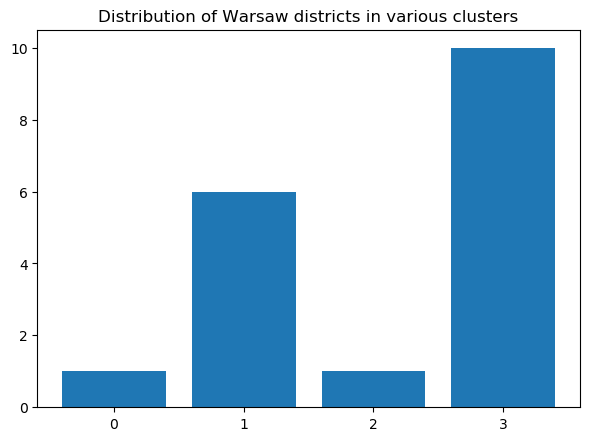

In [55]:
# Diagram of count of Warsaw districts in each cluster

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(w_sum_cl.index, height=w_sum_cl.District)
plt.title('Distribution of Warsaw districts in various clusters');

In [56]:
# Counting Budapest districts by Budapest clustering

b_sum_cl = budapest_merged[["Cluster Labels", "District"]].groupby("Cluster Labels").count()

b_sum_cl.index = b_sum_cl.index.astype(str)
 
b_sum_cl

,District
Cluster Labels,
0,1
1,6
2,6
3,10


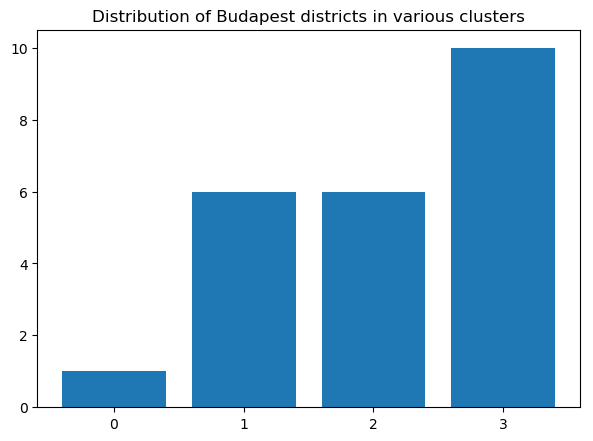

In [57]:
# Diagram of count of Budapest districts in each cluster

fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(b_sum_cl.index, height=b_sum_cl.District)
plt.title('Distribution of Budapest districts in various clusters');

In [58]:
# Counting Warsaw and Budapest districts in joint clusters

j_sum_cl = final_df_for_comparison[["City", "Joint Cluster labels", "District"]].groupby(["City", "Joint Cluster labels"]).count()

j_sum_cl

District
City     Joint Cluster labels          
Budapest 0                           12
         1                            6
         3                            5
Warsaw   1                            6
         2                            1
         3                           11